## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("..")

In [3]:
plt.rcParams["figure.figsize"] = (16, 9)
plt.rcParams["figure.facecolor"] = "black"
plt.rcParams["axes.facecolor"] = "black"
plt.rcParams['text.color'] = "#434343"
plt.rcParams["font.size"] = 16
plt.rcParams['axes.labelcolor'] = "#434343"
plt.rcParams['xtick.color'] = "#434343"
plt.rcParams['ytick.color'] = "#434343"
plt.rcParams['axes.edgecolor'] = "#434343"
plt.rcParams['savefig.facecolor'] = "black"
plt.rcParams['savefig.dpi'] = 100

## Google Trends FUT

In [6]:
df = pd.read_csv("../nsga2/examples/fifa_ultimate_team/data/raw/fifa_ultimate_team_interest_over_time.csv")

In [7]:
df.columns = ["month_str", "interest_str"]

In [8]:
df["month_datetime"] = pd.to_datetime(df["month_str"])
df["interest"] = df["interest_str"].str.replace("<", "").astype(int)
df = df[df["month_datetime"].apply(lambda x: x.year) > 2007]

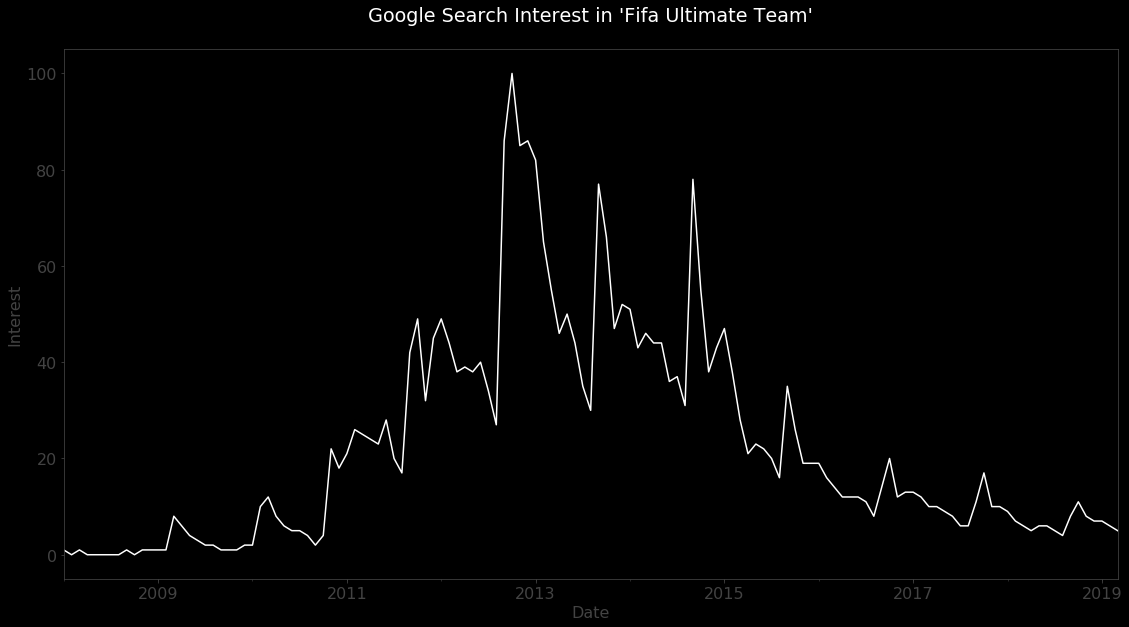

In [9]:
fig = plt.figure()
ax = fig.gca()

df.plot(x="month_datetime", y="interest", ax=ax, color="white")
ax.get_legend().remove()
ax.set_xlabel("Date")
ax.set_ylabel("Interest")
ax.set_title("Google Search Interest in 'Fifa Ultimate Team'\n", color="white")

plt.tight_layout()
plt.savefig("../presentation/images/plots/fifa_ultimate_team_interest_over_time.png")

## Non-Dominated Sorting

In [11]:
squads = [
    (1, 1),
    (2, 10),
    (3, 15),
    (4, 20),
    ()
]

In [12]:
MAX_R = 100

In [13]:
import numpy as np

In [14]:
def get_y(r, x):
    return np.sqrt(r ** 2 - x ** 2)

In [15]:
get_y(10, 5)

8.660254037844387

In [38]:
def make_point(r):
    x = np.random.uniform(1, r)
    y = get_y(r, x)
    x_new = 100 - int(x + np.random.normal(0, 0.05 * r))
    y_new = int(y + np.random.normal(0, 0.05 * r))
    return {"price": x_new, "overall": y_new}

In [40]:
points = {}
i = 0
for r in [100, 80, 60, 40, 20]:
    for _ in range(10):
        points[i] = make_point(r)
        i += 1
        
price = [p["price"] for p in points.values()]
overall = [p["overall"] for p in points.values()]

In [34]:
from nsga2.nsga2.sorter.non_dominated_sorter import NonDominatedSorter

In [43]:
sorter = NonDominatedSorter(greater_is_better_dict={"price": False, "overall": True})

In [45]:
pareto_front = sorter.sort(points)

In [46]:
for i, front in enumerate(pareto_front):
    for index in front:
        points[index]["pareto_front"] = i

In [49]:
fronts = [p["pareto_front"] for p in points.values()]

In [81]:
min_val = np.min([np.min(price), np.min(overall)])
max_val = np.max([np.max(price), np.max(overall)])

In [85]:
pareto_front

[[0, 1, 3, 4, 6, 7, 9],
 [2, 5, 13, 17],
 [8, 14, 15, 18, 19],
 [10, 11, 12, 16],
 [21, 23, 24, 25, 26, 27, 29],
 [22, 28, 33, 37],
 [20, 38],
 [32, 34, 35],
 [31, 36, 45],
 [30, 39, 40, 46],
 [42, 44, 48, 49],
 [41, 43, 47]]

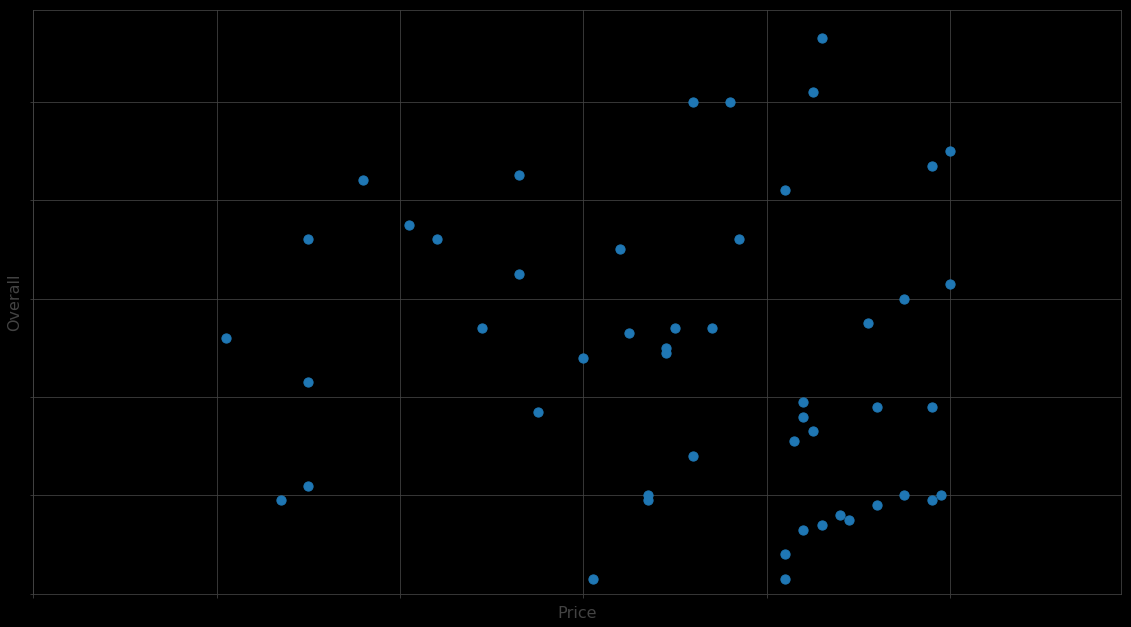

In [116]:
fig = plt.figure()
ax = fig.gca()

ax.grid(True, zorder=0, color="#434343")
ax.scatter(price, overall, zorder=2, s=85)
ax.set_xlim(0, max_val* 1.05)
ax.set_ylim(0, max_val * 1.05)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel("Price")
ax.set_ylabel("Overall")

plt.tight_layout()
plt.savefig("../presentation/images/plots/pareto_fronts/scatter.png")

In [117]:
highlight_index = [0, 1]
highlight_points = {index: points[index] for index in highlight_index}
highlight_price = [p["price"] for p in highlight_points.values()]
highlight_overall = [p["overall"] for p in highlight_points.values()]

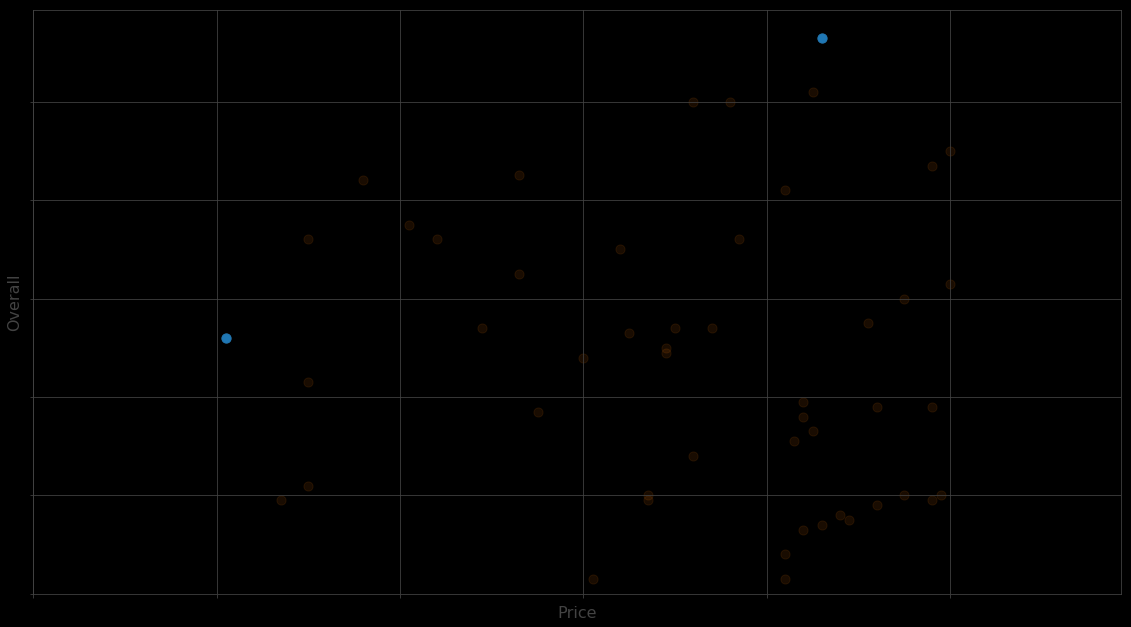

In [118]:
fig = plt.figure()
ax = fig.gca()

ax.grid(True, zorder=0, color="#434343")
ax.scatter(highlight_price, highlight_overall, alpha=1, zorder=2, s=85)
ax.scatter(price, overall, alpha=0.1, zorder=1, s=85)
ax.set_xlim(0, max_val* 1.05)
ax.set_ylim(0, max_val * 1.05)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel("Price")
ax.set_ylabel("Overall")

plt.tight_layout()
plt.savefig("../presentation/images/plots/pareto_fronts/scatter_non_dominated.png")

In [119]:
highlight_index = [0, 13]
highlight_points = {index: points[index] for index in highlight_index}
highlight_price = [p["price"] for p in highlight_points.values()]
highlight_overall = [p["overall"] for p in highlight_points.values()]

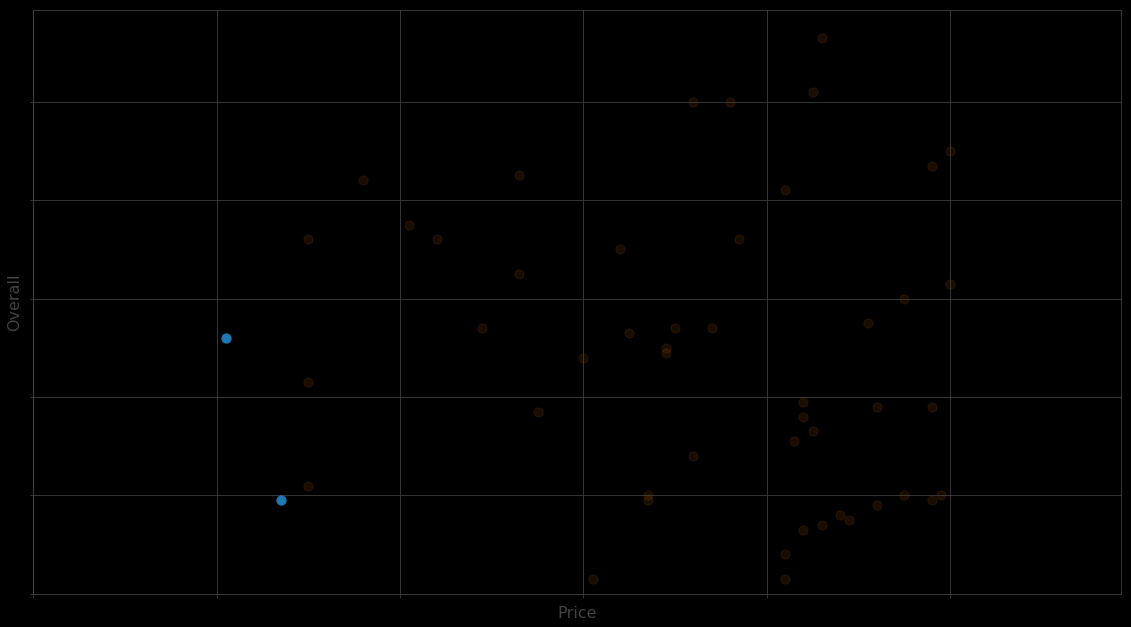

In [120]:
fig = plt.figure()
ax = fig.gca()

ax.grid(True, zorder=0, color="#434343")
ax.scatter(highlight_price, highlight_overall, alpha=1, zorder=2, s=85)
ax.scatter(price, overall, alpha=0.1, zorder=1, s=85)
ax.set_xlim(0, max_val* 1.05)
ax.set_ylim(0, max_val * 1.05)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel("Price")
ax.set_ylabel("Overall")

plt.tight_layout()
plt.savefig("../presentation/images/plots/pareto_fronts/scatter_dominated.png")

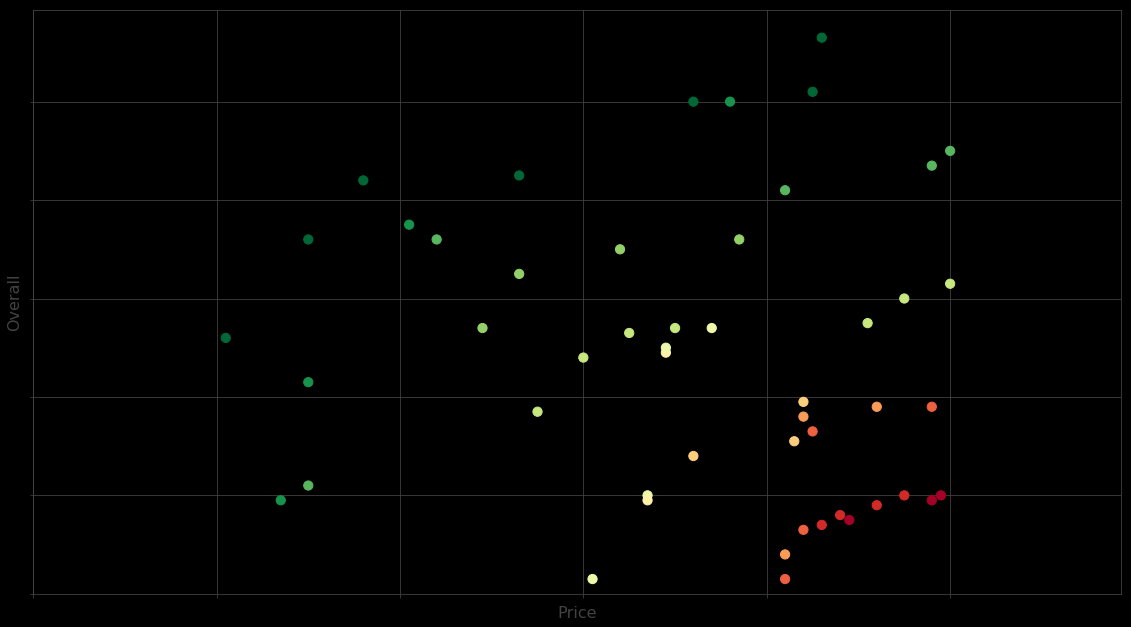

In [121]:
fig = plt.figure()
ax = fig.gca()

ax.grid(True, zorder=0, color="#434343")
h = ax.scatter(price, overall, c=fronts, cmap="RdYlGn_r", zorder=2, s=85)
# cbar = plt.colorbar(h)
# cbar.ax.set_ylabel("Pareto Front")
ax.set_xlim(0, max_val* 1.05)
ax.set_ylim(0, max_val * 1.05)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel("Price")
ax.set_ylabel("Overall")

plt.tight_layout()
plt.savefig("../presentation/images/plots/pareto_fronts/scatter_pareto_no_legend.png")

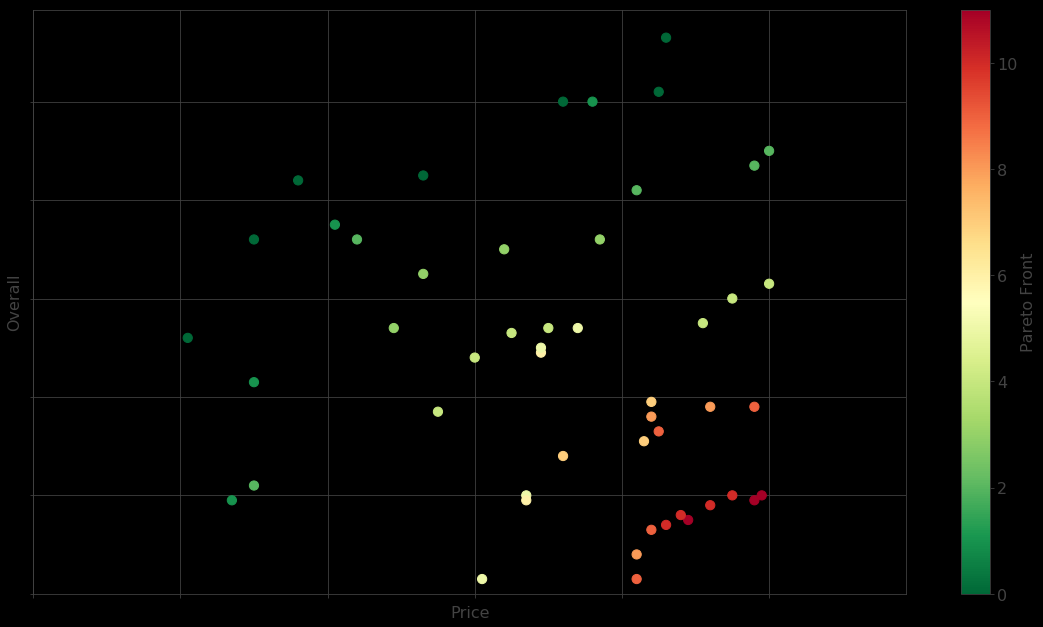

In [130]:
fig = plt.figure()
ax = fig.gca()

ax.grid(True, zorder=0, color="#434343")
h = ax.scatter(price, overall, c=fronts, cmap="RdYlGn_r", zorder=2, s=85)
cbar = plt.colorbar(h)
cbar.ax.set_ylabel("Pareto Front")
ax.set_xlim(0, max_val* 1.05)
ax.set_ylim(0, max_val * 1.05)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel("Price")
ax.set_ylabel("Overall")

plt.tight_layout()
plt.savefig("../presentation/images/plots/pareto_fronts/scatter_pareto_legend.png")

In [161]:
highlight_index = pareto_front[0]
highlight_points = {index: points[index] for index in highlight_index}
highlight_price = [p["price"] for p in highlight_points.values()]
highlight_overall = [p["overall"] for p in highlight_points.values()]
highlight_front = [0 for _ in pareto_front[0]]

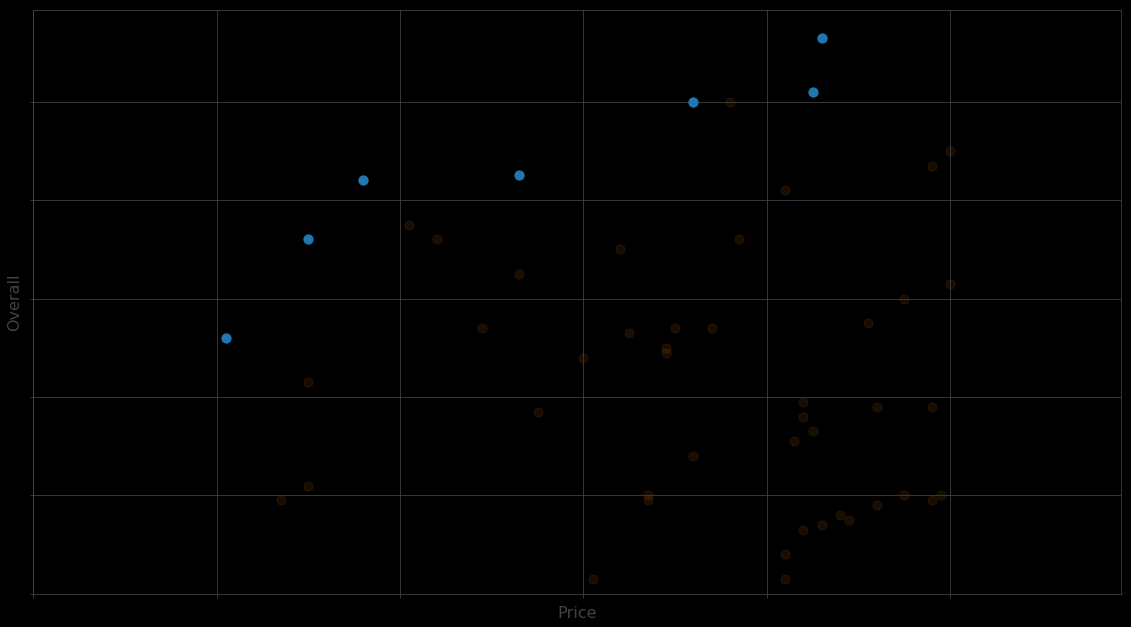

In [162]:
fig = plt.figure()
ax = fig.gca()

ax.grid(True, zorder=0, color="#434343")
ax.scatter(highlight_price, highlight_overall, zorder=2, s=85)
ax.scatter(price, overall, alpha=0.1, zorder=1, s=85)
ax.set_xlim(0, max_val* 1.05)
ax.set_ylim(0, max_val * 1.05)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel("Price")
ax.set_ylabel("Overall")

plt.tight_layout()
plt.savefig("../presentation/images/plots/pareto_fronts/scatter_pareto_0.png")

In [163]:
from nsga2.nsga2.sorter.crowding_distance_sorter import CrowdingDistanceSorter

In [164]:
def make_crowding_distance(values):
    values = pd.Series(values).sort_values()
    previous_values = values.shift(1)
    next_values = values.shift(-1)
    neighbor_delta = np.abs(next_values - previous_values)
    max_value = values.max()
    min_value = values.min()
    min_max_delta = np.abs(max_value - min_value)
    crowding_distance = (neighbor_delta / min_max_delta).fillna(1)
    crowding_distance = crowding_distance.to_dict()
    return crowding_distance

In [165]:
crowding_distance_dict = {key: 0 for key in highlight_points}

for key, value in make_crowding_distance(highlight_price).items():
    crowding_distance_dict[list(crowding_distance_dict.keys())[key]] += value
    
for key, value in make_crowding_distance(highlight_overall).items():
    crowding_distance_dict[list(crowding_distance_dict.keys())[key]] += value

In [166]:
highlight_distance = list(crowding_distance_dict.values())

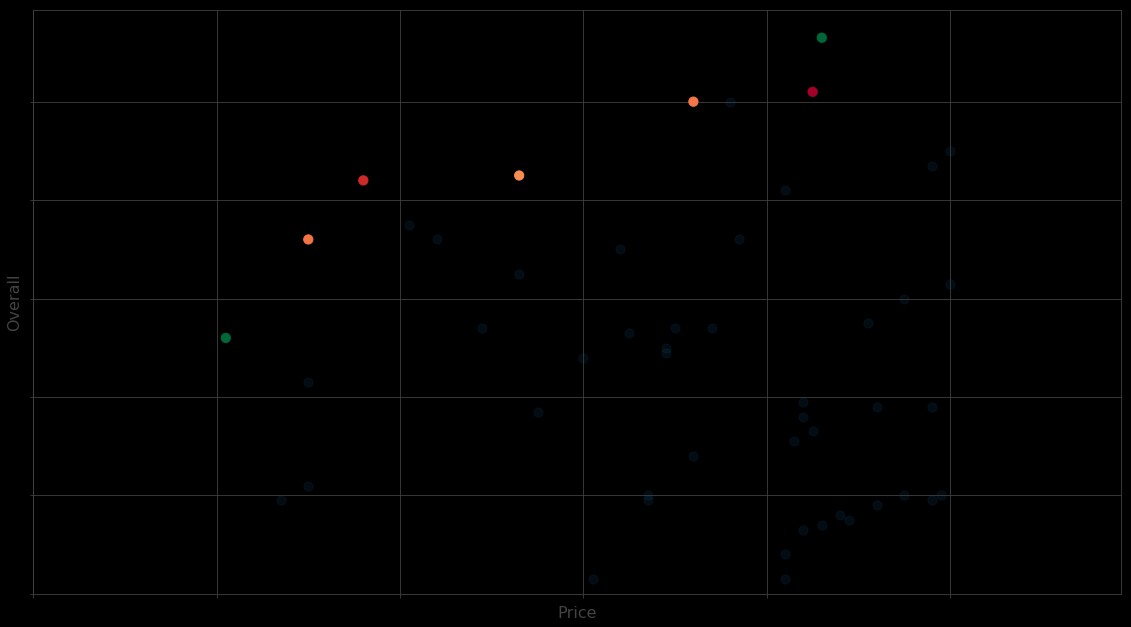

In [167]:
fig = plt.figure()
ax = fig.gca()

ax.grid(True, zorder=0, color="#434343")
ax.scatter(highlight_price, highlight_overall, zorder=2, s=85, c=highlight_distance, cmap="RdYlGn")
ax.scatter(price, overall, alpha=0.1, zorder=1, s=85)
ax.set_xlim(0, max_val* 1.05)
ax.set_ylim(0, max_val * 1.05)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel("Price")
ax.set_ylabel("Overall")

plt.tight_layout()
plt.savefig("../presentation/images/plots/pareto_fronts/scatter_pareto_0_cd.png")